In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_openml

In [ ]:
# task 1  : why dont we use Boston dataset
# task 2 : run this same model on synthetic data generated in last lab

#HOMEWORK DUE NEXT MONDAY 
# task 3 : choose a dataset of your own choice and apply multiple linear resgression

In [2]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)

In [3]:
print(housing.keys()) #shows the available outputs. 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [7]:
housing.target


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [6]:
housing.data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [8]:
#make a dataframe from the given data
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


In [9]:
#add target value to the dataset
housing_df['price'] = housing.target

In [10]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [13]:
#right after loading the data we first check for missing values as it causes issues 

housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
price              0
Length: 81, dtype: int64

In [14]:
housing_df = housing_df.dropna(1)
print(housing_df.dtypes)
#housing_df = housing_df.drop('MSZoning', axis=1)

Id               float64
MSSubClass       float64
MSZoning          object
LotArea          float64
Street            object
                  ...   
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
price            float64
Length: 62, dtype: object


C:\Users\saniy\AppData\Local\Temp/ipykernel_12476/3237365561.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  housing_df = housing_df.dropna(1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


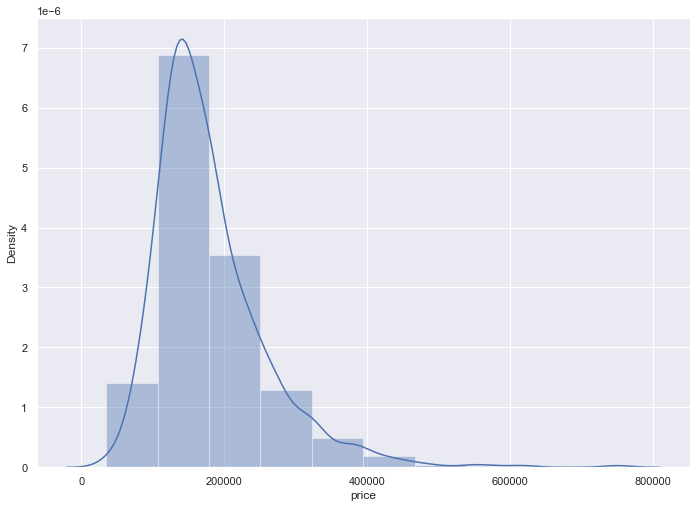

In [17]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing_df['price'], bins=10)
plt.show()

<AxesSubplot:>

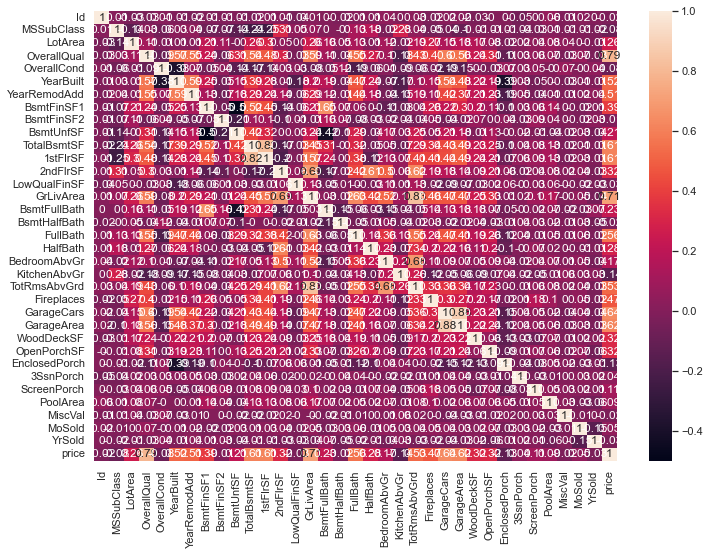

In [24]:
correlation_matrix = housing_df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is
#a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

#another thing to definitely check is multi-co-linearity
#https://stats.stackexchange.com/a/1150

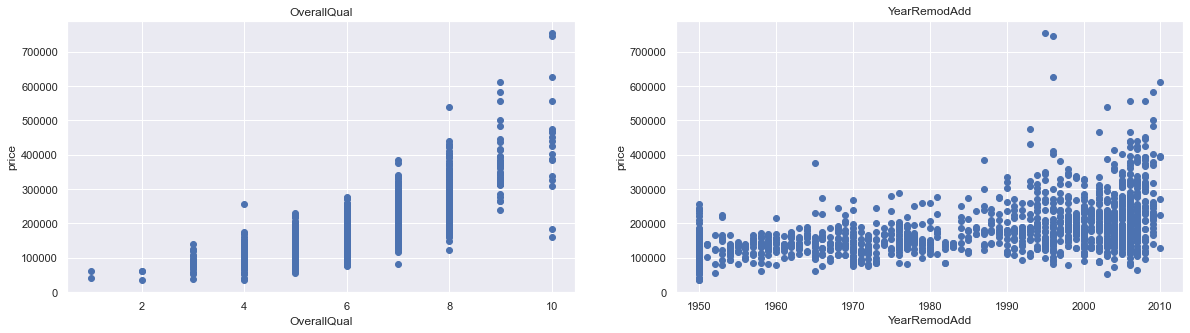

In [25]:

# OverallQual,YearRemodAdd

#lets plot these

plt.figure(figsize=(20, 5))

features = ['OverallQual','YearRemodAdd']
target = housing_df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [ ]:
#Task 2. find out why we dont use boston dataset. 
# Task 3. Find another dataset of your choice and replicate Linear Regression

In [26]:
#housing_df.isna().values.any()
#housing_df.isnull().values.any()
#housing_df = housing_df.dropna()
print(housing_df.isnull().values.any())

False


In [27]:
#dividing into  X and Y

X = pd.DataFrame(np.c_[housing_df['OverallQual'], housing_df['YearRemodAdd']], columns = ['OverallQual','YearRemodAdd'])
y = housing_df['price']

print(X.dtypes)
print(y.dtypes)

OverallQual     float64
YearRemodAdd    float64
dtype: object
float64


In [28]:
#dividing into test and train 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1168, 2)
(292, 2)
(1168,)
(292,)


In [29]:
#training and testing model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 47915.51889430781
R2 score is 0.6332465144241337


The model performance for testing set
--------------------------------------
RMSE is 2390813354.9620624
R2 score is 0.6316161904212326


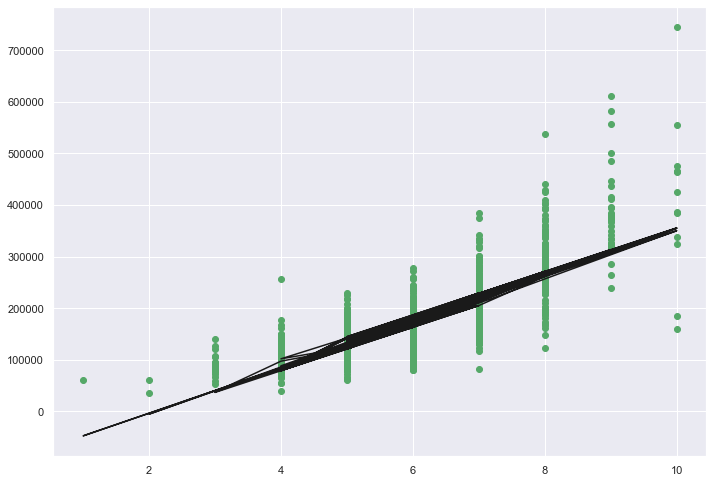

In [33]:
#plot to see
plt.scatter(X_train['OverallQual'], Y_train,color='g') 
#plt.scatter(X_train['YearRemodAdd'], Y_train,color='b') 
plt.plot(X_test['OverallQual'], y_test_predict,color='k') 



plt.show()

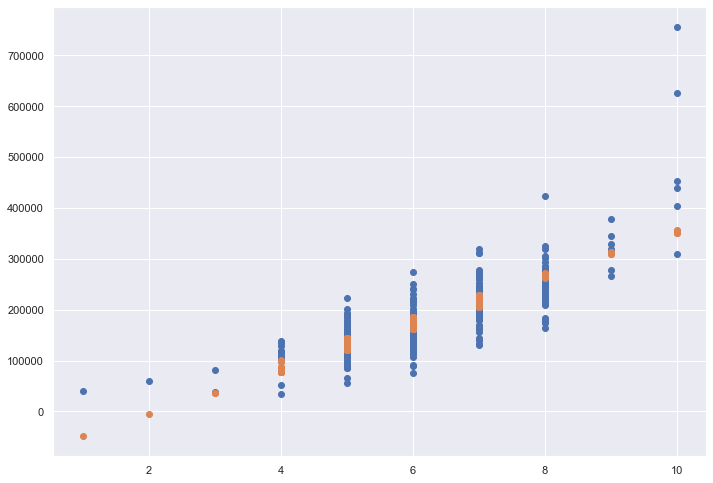

In [34]:
plt.scatter(X_test['OverallQual'],Y_test)
plt.scatter(X_test['OverallQual'],y_test_predict)
plt.show()